In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Descriptive Statistics 

In [214]:
data = pd.read_csv("2017-18_NBA_salary.csv")
df = data.copy() ## create copy 
df.tail()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
480,Al Horford,27734405,Dominican Rep...,3,31,BOS,70,2219,17.5,0.577,...,14.3,18.4,3.8,3.8,7.6,0.164,1.1,3.0,4.1,3.4
481,Abdel Nader,1167333,Egypt,58,24,BOS,44,463,5.7,0.464,...,17.1,16.9,-0.6,0.7,0.0,0.004,-5.3,0.3,-5.0,-0.3
482,Aaron Harrison,83129,USA,62,23,DAL,7,164,6.6,0.411,...,3.9,14.4,-0.1,0.2,0.1,0.019,-3.2,0.3,-2.9,0.0
483,Aaron Gordon,5504420,USA,4,22,ORL,55,1838,16.6,0.531,...,9.7,24.5,1.1,1.9,3.0,0.078,0.1,-0.1,0.1,1.0
484,Aaron Brooks,2116955,USA,26,33,MIN,31,188,10.1,0.508,...,11.9,19.7,0.1,0.1,0.2,0.039,-0.5,-3.7,-4.1,-0.1


In [62]:
pd.set_option("precision", 3)
df.describe() ## The dataset has 485 rows 

,Salary,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,4.830e+02,483.000,483.000,483.000,483.000,483.000,483.000,483.000,483.000,483.000,...,483.000,483.000,483.000,483.000,483.000,483.000,483.000,483.000,483.000,483.000
mean,6.661e+06,29.395,26.273,50.371,1158.915,13.316,0.535,0.337,0.263,4.894,...,13.140,18.976,1.281,1.181,2.465,0.080,-1.253,-0.489,-1.742,0.601
std,7.398e+06,21.116,4.274,24.724,809.628,8.746,0.112,0.227,0.295,4.582,...,6.115,5.827,1.884,1.034,2.675,0.163,5.029,2.394,5.666,1.248
min,4.608e+04,1.000,19.000,1.000,1.000,-41.100,0.000,0.000,0.000,0.000,...,0.000,5.700,-2.300,0.000,-1.200,-1.063,-36.500,-14.300,-49.200,-1.300
25%,1.471e+06,10.500,23.000,29.500,385.000,9.800,0.506,0.167,0.155,1.800,...,9.900,15.000,0.000,0.300,0.300,0.040,-2.600,-1.700,-3.500,-0.100
50%,3.218e+06,25.000,26.000,59.000,1151.000,13.200,0.545,0.346,0.231,3.300,...,12.500,17.900,0.800,1.000,1.900,0.083,-1.100,-0.400,-1.300,0.100
75%,1.000e+07,47.000,29.000,71.000,1824.500,16.550,0.583,0.481,0.320,7.050,...,15.750,22.250,2.000,1.800,3.600,0.123,0.400,1.000,0.550,0.900
max,3.468e+07,62.000,41.000,79.000,2898.000,134.100,1.500,1.000,5.333,35.900,...,66.700,45.100,11.400,5.600,15.000,2.713,68.700,6.800,54.400,8.600


Normally check which variables are highly correlated with Pearson's Correlation Coefficient that assumes a normal distribution of involved attributes.

So first, let's use Shapiro-Wilk test for normality to see if the data is Gaussian or not where the null hypothesis is that it is normal. 

In [90]:
from scipy.stats import shapiro

num_data = df.iloc[:, 8:]

stat, p = shapiro(num_data)
print("Statistics %.3f, p = %.3f" % (stat,p))

if p < 0.5: ## reject null
    print("The distribution is not Gaussian. Might need to use nonparametric methods for salary prediction")

Statistics 0.798, p = 0.000
The distribution is not Gaussian. Might need to use nonparametric methods for salary prediction


/Users/tomtom/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


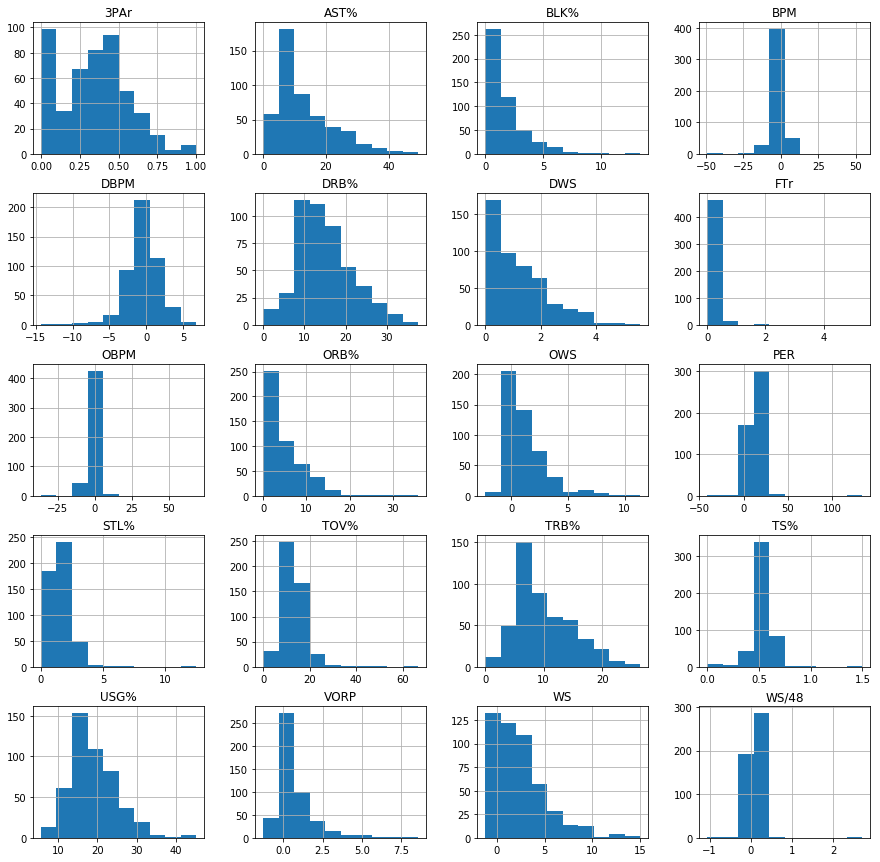

In [89]:
num_data.hist(figsize  = (15,15))
plt.show()

From the SW test, it appears that parametric methods may not be suited as the distribution but most of the variables are shown to be somewhat Gaussian in nature based on histograms

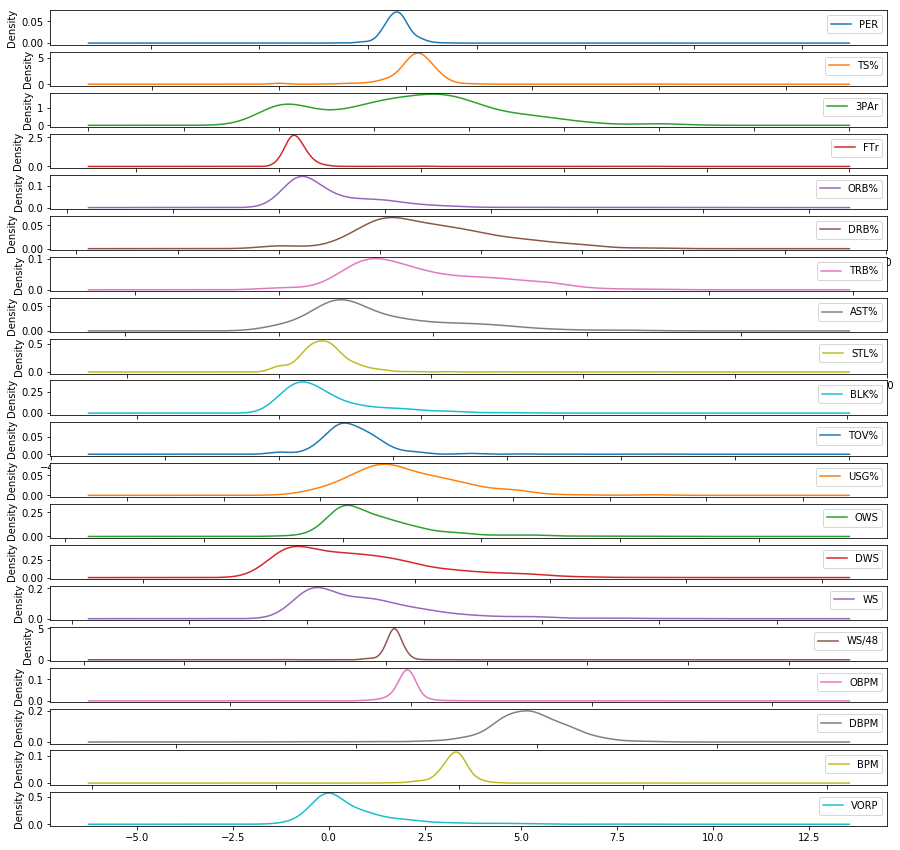

In [98]:
## Trying out density form 
num_data.plot(kind = "density", subplots = True, sharex = False, figsize = (15,15))
plt.show()

Now let's check the pairwise correlations of the variables. Regression methods can perform poorly if there are highly correlated variables used in conjunction in the same model 

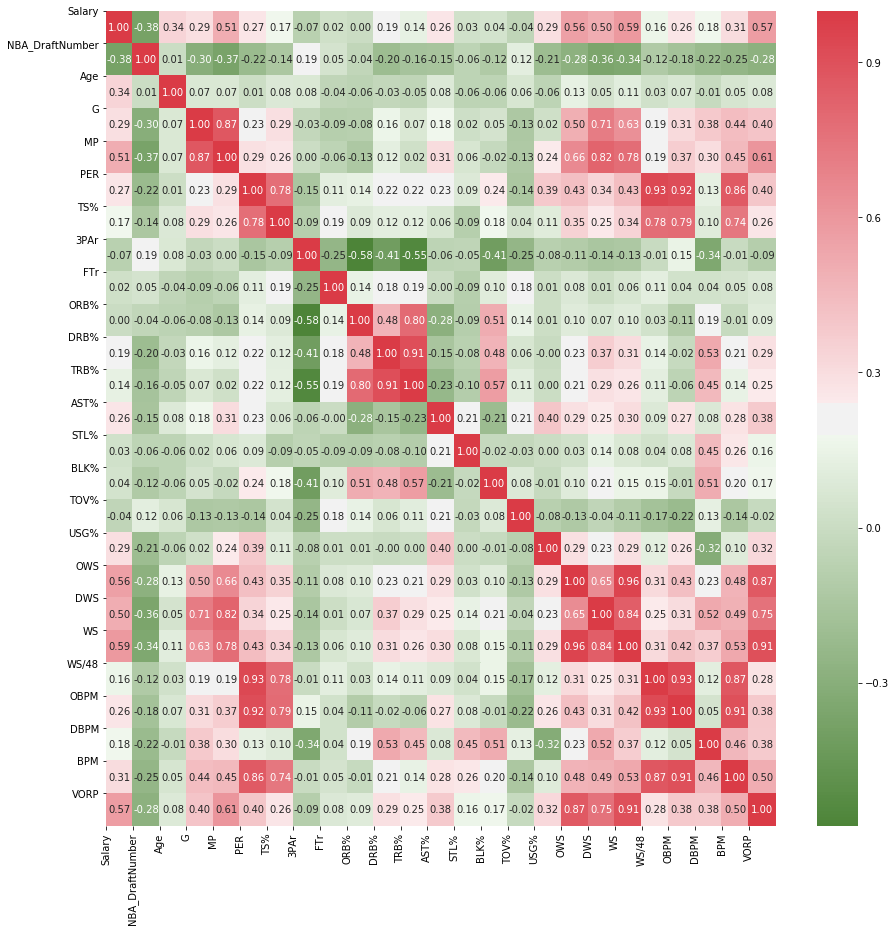

In [130]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
cmap = sns.diverging_palette(121, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


From the heatmap above, we can see that there are several features that are highly correlated with one another. In order to reduce complexity and multicollinearity, we want to exclude the columns from the correlation matrix that are highly correlated. The way the function below works is that a copy of the dataframe and a correlation matrix associated are created. For each row, we go through the columns and see if there is a correlation > threshold. If there is, we delete that column from the dataframe. 

https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on/43104383#43104383

In [235]:
def correlation(df, threshold):
    col_corr = set()
    df_copy = df.copy()
    corr_matrix = df_copy.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in df_copy.columns:
                    del df_copy[colname]
    return df_copy 

df_nocorr = correlation(df, 0.7)
df_nocorr

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,PER,3PAr,FTr,ORB%,DRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DBPM
0,Zhou Qi,815615,China,43,22,HOU,16,0.6,0.593,0.370,6.5,16.8,1.5,1.1,6.8,18.2,19.5,-0.4,0.5
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,16.8,0.004,0.337,11.0,25.0,15.4,1.9,1.3,19.3,17.2,1.7,1.3
2,Zach Randolph,12307692,USA,19,36,SAC,59,17.3,0.193,0.140,7.0,23.8,14.9,1.4,0.6,12.5,27.6,0.3,-1.3
3,Zach LaVine,3202217,USA,13,22,CHI,24,14.6,0.346,0.301,1.4,14.4,18.6,1.8,0.5,9.7,29.5,-0.1,-2.0
4,Zach Collins,3057240,USA,10,20,POR,62,8.2,0.387,0.146,4.9,18.3,7.3,0.8,2.5,15.6,15.5,-0.4,0.9
5,Yogi Ferrell,1312611,USA,62,24,DAL,79,11.5,0.489,0.141,1.3,11.3,13.3,1.4,0.3,9.1,17.0,1.6,-0.5
6,Xavier Silas,74159,USA,62,30,BOS,2,-4.9,0.667,0.000,15.9,15.4,0.0,7.2,0.0,0.0,19.2,-0.1,-0.7
7,Xavier Rathan-Mayes,46080,Canada,62,23,MEM,5,0.9,0.333,0.214,0.0,5.0,23.2,2.6,2.4,19.3,21.7,-0.5,-1.9
8,Wilson Chandler,12016854,USA,23,30,DEN,70,11.1,0.390,0.186,5.0,14.0,9.7,0.9,1.4,12.0,14.6,2.0,-0.6
9,Willy Hernangomez,1435750,Spain,35,23,TOT,45,20.6,0.075,0.555,13.6,25.2,11.0,1.8,2.8,15.4,21.7,0.8,0.6


### Preprocessing 

Split data first. Then need to clean up any missing values, standardize the input data and binarize any qualitative variables. 

#### Train-Test Split

In [236]:
## removing country, team, and player as well
df_nocorr = df_nocorr.drop(columns = ["NBA_Country", "Tm", "Player"]) 

# input data 
input_data = df_nocorr.drop(columns = ["Salary"])
output = df_nocorr["Salary"]
input_data.head()

,NBA_DraftNumber,Age,G,PER,3PAr,FTr,ORB%,DRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DBPM
0,43,22,16,0.6,0.593,0.370,6.5,16.8,1.5,1.1,6.8,18.2,19.5,-0.4,0.5
1,42,33,66,16.8,0.004,0.337,11.0,25.0,15.4,1.9,1.3,19.3,17.2,1.7,1.3
2,19,36,59,17.3,0.193,0.140,7.0,23.8,14.9,1.4,0.6,12.5,27.6,0.3,-1.3
3,13,22,24,14.6,0.346,0.301,1.4,14.4,18.6,1.8,0.5,9.7,29.5,-0.1,-2.0
4,10,20,62,8.2,0.387,0.146,4.9,18.3,7.3,0.8,2.5,15.6,15.5,-0.4,0.9


In [200]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_data, output, test_size=0.2, random_state=42)
estimators = []

The preprocessing steps and feature selection will be incorporated into pipelines so as to avoid data leakage and to standardize the workflow for cross-validation. 

#### Missing Values

Let's see how many missing values are there in the overall dataset 

In [203]:
null_vals = df_nocorr.isnull().sum()
null_vals = null_vals[null_vals != 0] ## filter for only the missing vals 
null_vals = null_vals.reset_index() ## reset_index() creates dataframe
null_vals.columns = ["Variable", "Miss"]
null_vals

,Variable,Miss
0,3PAr,2
1,FTr,2
2,TOV%,2


Because of the low number of missing for the variables, we can use the median for these values

In [180]:
from sklearn.preprocessing import Imputer
estimators.append(("imputer", Imputer))

#### Standardizing Values 

Because some of the variables are not Gaussian, we would want to avoid using a Standard Scaler as that relies on using the mean and standard deviation whereas the MinMax uses only the minimum and maximum values 

In [182]:
from sklearn.preprocessing import MinMaxScaler
estimators.append(("min_max", MinMaxScaler))

### Feature Selection

Let's see what each variable's correlation with the overall target variable (Salary)

In [193]:
target_corr = df_nocorr.corr()
target_corr["Salary"].sort_values(ascending = False)

Salary             1.000
OWS                0.563
Age                0.336
USG%               0.299
G                  0.298
PER                0.270
AST%               0.266
DRB%               0.196
DBPM               0.178
BLK%               0.045
STL%               0.036
FTr                0.023
ORB%               0.004
TOV%              -0.043
3PAr              -0.074
NBA_DraftNumber   -0.382
Name: Salary, dtype: float64

Currently, there are not too many variables that may or may not have a strong correlation with the input. There are a variety of methods to select only a few of the features. We will perform a few of them and see if there are commonalities among them to make a decision.

#### Univariate Selection 

Uses the SelectKBest class which relies on the F-statistic (and p-value) test

In [249]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

## Because Pipeline with imputer isn't ready yet and because SelectKBest needs no Nans, we write up a
## one with median 

input_data_copy = input_data.copy()
imp_med = SimpleImputer(strategy = "median")
inn = imp_med.fit_transform(input_data_copy)
type(inn)
# test = SelectKBest(score_func= f_regression, k = 4)
# test.fit(input_data_copy, output)

ModuleNotFoundError: No module named 'sklearn.impute'